# Identifies coins in image from their diameter

In [48]:
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.patches as mpatches

from skimage import data
from skimage.filters import threshold_otsu
from skimage.segmentation import clear_border
from skimage.measure import label, regionprops
from skimage.morphology import closing, square
from skimage.color import label2rgb

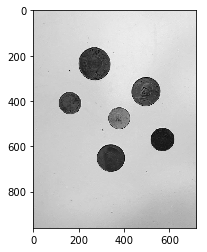

In [49]:
import matplotlib.image as img
from skimage import color
from skimage import io

image = color.rgb2gray(io.imread('coins.jpg'))
plt.imshow(image, cmap='binary')

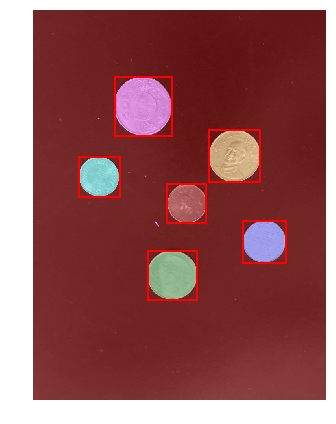

[143.0, 127.5, 98.5, 96.0, 104.5, 122.0]
There is a total of 77 NTD.


In [51]:
# apply threshold (make black and white)
thresh = threshold_otsu(image)
# make coin a complete circular object
bw = closing(image > thresh, square(3))
# remove artifacts connected to image border
cleared = clear_border(bw)
# label image regions
label_image = label(cleared)
image_label_overlay = label2rgb(label_image, image=image)
fig, ax = plt.subplots(figsize=(10, 6))
ax.imshow(image_label_overlay)

coinSize = []
# give property of each region
for region in regionprops(label_image):
    # take regions with large enough areas
    if region.area >= 100:
        # draw rectangle around segmented coins
        minr, minc, maxr, maxc = region.bbox
        rect = mpatches.Rectangle((minc, minr), maxc - minc, maxr - minr,
                                  fill=False, edgecolor='red', linewidth=2)
        dia = ((maxc - minc) + (maxr - minr))/2
        coinSize.append(dia)
        ax.add_patch(rect)

ax.set_axis_off()
plt.tight_layout()
plt.show()

print(coinSize)
# count coins
worth = 0
for d in coinSize:
    if d >= 140:
        worth += 50
    elif 140 > d >= 120:
        worth += 10
    elif 120 > d >= 100:
        worth += 5
    elif 100 > d:
        worth += 1
print('There is a total of {} NTD.'.format(worth))